In [1]:
# 3.1.4 디지털 영상 기초: RGB 컬러 영상을 채널별로 구분해 시각화하기(84쪽)

import cv2 as cv
import sys

img = cv.imread("soccer.jpg") 

if img is None: # 파일이 img에 제대로 존재하지 않으면 더이상 실행하지 않도록 알람 띄우고 멈춤
    sts.exit("파일을 찾을 수 없습니다.")
    
cv.imshow('original_RGB', img) # 기존의 이미지 디스플레이
cv.imshow('Upper left half', img[0:img.shape[0]//2, 0:img.shape[1]//2,:]) # 왼쪽 상단의 이미지만 잘라서 디스플레이
cv.imshow('Cemter half', img[img.shape[0]//4:3*img.shape[0]//4,img.shape[1]//4:3*img.shape[1]//4, :]) # 중앙부분만 디스플레이
cv.imshow('R channel', img[:,:,2]) # Red 색만 디스플레이
cv.imshow('G channel', img[:,:,1]) # Green
cv.imshow('B channel', img[:,:,0]) # Blue

cv.waitKey()
cv.destroyAllWindows()

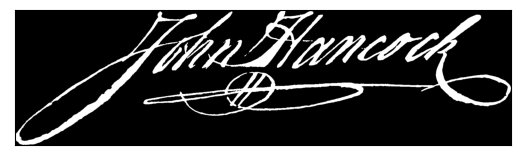

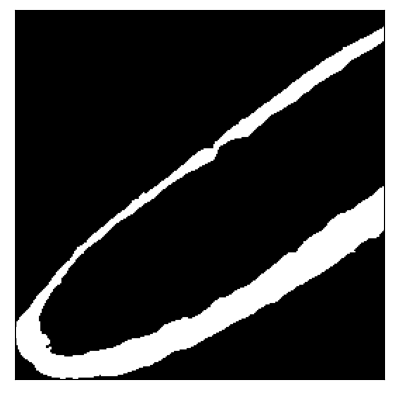

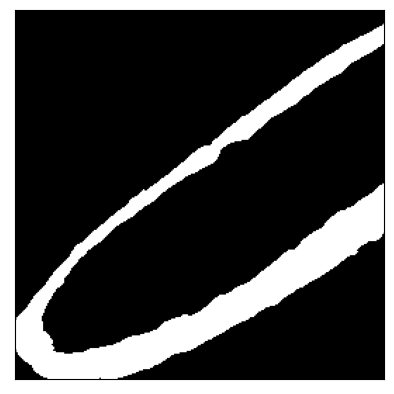

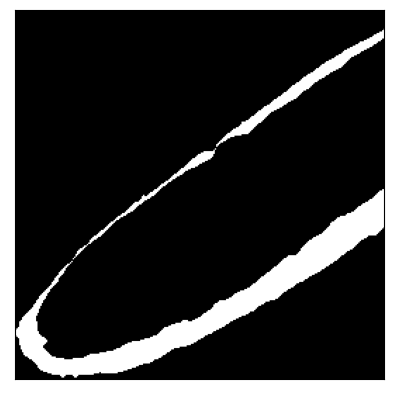

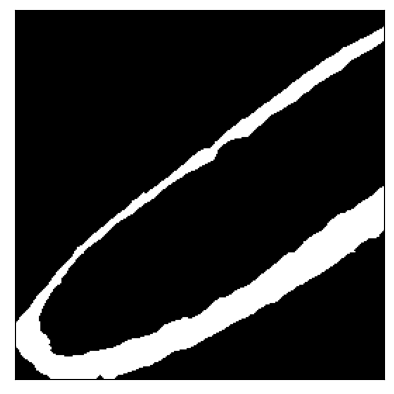

In [19]:
# 3.2.4 모폴로지: 모폴로지 연산 적용하기(92쪽)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 서명 영상 읽어오기
# png 채널에는 4개의 채널이 있으므로 IMREAD_UNCHANGED 인수를 주어 모든 채널을 읽어오도록 지정
img = cv.imread("JohnHancocksSignature.png", cv2.IMREAD_UNCHANGED) 

# img.shape으로 확인하면 img는 크기가 525x1920인 채널이 4개인 영상임을 알 수 있다.

# 1,2,3번 채널 중 3번 채널이 서명을 담고 있음
#img의 3번 채널, 즉 img[:,:,3]에 오츄 이진화를 적용한 결과를 bin_img에 저장
t, bin_img = cv.threshold(img[:, :, 3], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(bin_img, cmap="gray"), plt.xticks([]), plt.yticks([]) # matplotlib 모듈의 imshow함수로 bin_img 이미지 출력, cmap="gray"로 지정해 명암 영상으로 출력
plt.show()

# 모폴로지 효과를 확인할 목적으로 영상의 일부만 잘라 b에 저장하고, 잘라낸 패치를 디스플레이
b = bin_img[bin_img.shape[0] // 2 : bin_img.shape[0], 0 : bin_img.shape[0] // 2 + 1]
plt.imshow(b, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

# 구조 요소를 se 객체에 저장, [그림3-12]의 두번재 구조 요소.
se = np.uint8(
    [
        [0, 0, 1, 0, 0],  # 구조 요소
        [0, 1, 1, 1, 0],
        [1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0],
        [0, 0, 1, 0, 0],
    ]
)

b_dilation = cv.dilate(b, se, iterations=1)  # 팽창 연산, iterations 매개변수는 적용 회수를 나타냄, 1로 설정해 한번만 적용
plt.imshow(b_dilation, cmap="gray"), plt.xticks([]), plt.yticks([]) # 팽창을 적용한 영상 b_dilation 디스플레이
plt.show()

b_erosion = cv.erode(b, se, iterations=1)  # 침식 연산
plt.imshow(b_erosion, cmap="gray"), plt.xticks([]), plt.yticks([]) # 침식을 적용한 영상b_erosion 디스플레이
plt.show()

# 침식을 적용한 영상에 침식 적용 => 닫기 연산
b_closing = cv.erode(cv.dilate(b, se, iterations=1), se, iterations=1)  # 닫기 연산
plt.imshow(b_closing, cmap="gray"), plt.xticks([]), plt.yticks([]) # 닫기를 적용한 영상 디스플레이
plt.show()

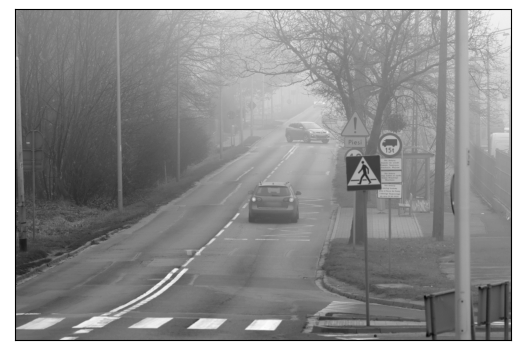

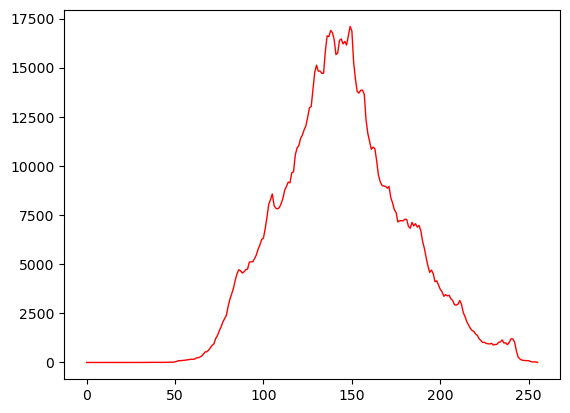

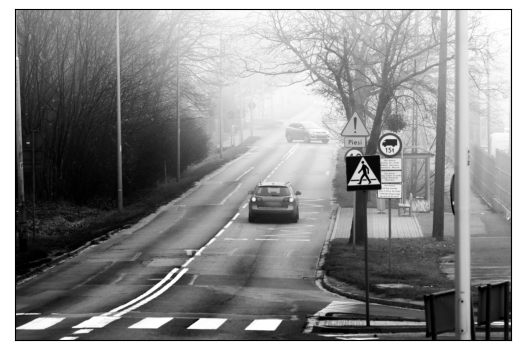

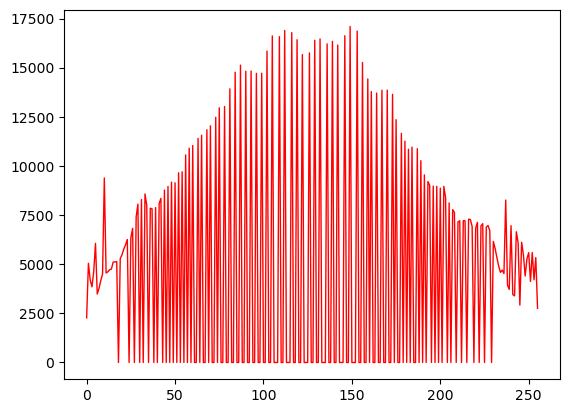

([<matplotlib.lines.Line2D at 0x1ffec975430>], None)

In [20]:
# 3.2.2 히스토그램 평활화: 히스토그램 평활화하기(98쪽)

import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("mistyroad.jpg") # 안개가 낀 도로 영상 읽기

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # img를 명암 영상으로 변환
plt.imshow(gray, cmap="gray"), plt.xticks([]), plt.yticks([]), plt.show() # 변환한 영상 디스플레이

# 히스토그램을 구해 디스플레이
h = cv.calcHist([gray], [0], None, [256], [0, 256])  
plt.plot(h, color="r", linewidth=1), plt.show()

equal = cv.equalizeHist(gray)  # 명암 영상 gray에 히스토그램 평활화를 적용하고 결과 영상을 equal객체에 저장
plt.imshow(equal, cmap="gray"), plt.xticks([]), plt.yticks([]), plt.show() # equal 영상 디스플레이

h = cv.calcHist([equal], [0], None, [256], [0, 256])  # equal 영상의 히스토그램 구하기
plt.plot(h, color="r", linewidth=1), plt.show() # 구한 히스토그램 디스플레이

In [21]:
# 4.1.2 에지 연산자: 소벨 엣지 검출하기(124쪽)

import cv2 as cv

img = cv.imread("soccer.jpg") # 이미지 읽기
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # 컬러 영상을 명암으로 변환

grad_x = cv.Sobel(gray, cv.CV_32F, 1, 0, ksize=3) # 소벨 연산자 적용. Sobel함수로 x의 방향의 연산자 적용
# 두번째 인수는 결과 영상을 32비트 실수 맵에 저장하라고 지시, 세번째 인수는 x의 방향 연산자를 사용하라고 지시, 네번째 인수는 3x3 크기 사용하라고 지정
grad_y = cv.Sobel(gray, cv.CV_32F, 0, 1, ksize=3) # 소벨 연산자 적용. Sobel함수로 y의 방향의 연산자 적용

# 음수가 포함된 맵에 절댓값을 취해 양수로 변환.convertScaleAbs함수는 부호 없는 8비트 형인 CV_8U(numpy의 unit8과 같음)맵을 만드는데, 크기가 0보다 작은 값은 0,255를 넘는 값은 255로 바꾸어 기록
sobel_x = cv.convertScaleAbs(grad_x)
sobel_y = cv.convertScaleAbs(grad_y)

# 에지 강도 계산
edge_strength = cv.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)  # addWeighted함수는 sobel_x와 sobel_y에 0.5를 곱해서 더한 결과를 저장
# addWeighted(img1, a, img2, b, c)는 img1 x img2 x b + c를 계산

# 실행 결과를 디스플레이
cv.imshow("Original", gray)
cv.imshow("sobelx", sobel_x)
cv.imshow("sobely", sobel_y)
cv.imshow("edge strength", edge_strength)

cv.waitKey()
cv.destroyAllWindows()

In [24]:
# 4.3.2 허프 변환: 허프 변환을 이용해 사과 검출하기(133쪽)

import cv2 as cv

img = cv.imread("apples.jpg") # 이미지 로드
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # 컬러 영상을 명암으로 변환
 
# HoughCircles함수는 첫번째 인수인 명암 영상에서 원을 검출해 중심과 반지름을 저장한 리스트 반환
# 두번째 인수는 여러 변형 알고리즘 중의 하나를 지정하는데 cv2.HOUGH_GRADIENT는 에지 방향 정보를 추가로 사용하는 방법
# 세번째 인수는 누적 배열의 크기를 지정하는데 1로 설정하면 입력 영상과 같은 크기를 사용
# 네번째 인수는 원 사이의 최소 거리를 지정하는데 작을수록 많은 원이 검출
# 다섯번째 인수는 캐니 에지 알고리즘이 사용하는 T
# 여섯번째 인수는 비최대 억제를 적용할 때 쓰는 임계값.
# 일곱번째와 여덟번째 인수는 원의 최소와 최대 반지름 지정
apples = cv.HoughCircles(
    gray, cv.HOUGH_GRADIENT, 1, 200, param1=150, param2=20, minRadius=50, maxRadius=120
)

# apples리스트가 가진 원의 중심과 반지름 정보를 이용하여 영상에 원을 그려 넣음
for i in apples[0]:
    cv.circle(img, (int(i[0]), int(i[1])), int(i[2]), (255, 0, 0), 2)

cv.imshow("Apple detection", img) # 디스플레이

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
# 4.4.3 최적화 분할: 정규화 절단 알고리즘으로 영역 분할하기(142쪽)

import skimage
import numpy as np
import cv2 as cv
import time

coffee = skimage.data.coffee() # 영상 읽어오기

# 분할하는데 걸리는 시간을 측정해 출력
start = time.time() 
slic = skimage.segmentation.slic(coffee, compactness=20, n_segments=600, start_label=1) # slic함수는 영상을 600개 슈퍼 화소로 분할해 저장
g = skimage.future.graph.rag_mean_color(coffee, slic, mode="similarity") # rag_mean_color 함수는 슈퍼 화소를 노드로 사용하고 'similarity'를 에지 가중치로 사용한 그래프 구성하여 g 객체에 저장
ncut = skimage.future.graph.cut_normalized(slic, g)  # 정규화 절단, cut_normalized함수는 slic와 g 객체 정보를 이용하여 정규화를 수행하고 결과를 ncut(화소에 영역의 번호를 부여한 맵)에 저장
print(coffee.shape, " Coffee 영상을 분할하는데 ", time.time() - start, "초 소요") 

marking = skimage.segmentation.mark_boundaries(coffee, ncut) # 원래 영상인 coffee에 영역 분할 정보를 담은 ncut맵을 이용하여 영역 경계를 표시하고 marking 객체에 저장
ncut_coffee = np.uint8(marking * 255.0) # 0~1 사이의 실수 가진 marking을 0~255 사이의 unit8형 변환

cv.imshow("Normalized cut", cv.cvtColor(ncut_coffee, cv.COLOR_RGB2BGR)) #RGB로 표현된 분할 영상을 BGR로 변환하여 디스플레이

cv.waitKey()
cv.destroyAllWindows()

In [25]:
# 5.4 SIFT: SIFT 검출(181쪽) 

import cv2 as cv

img = cv.imread("mot_color70.jpg")  # 영상 읽기
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # 컬러 영상 명암 영상으로 변환

sift = cv.SIFT_create() # SIFT_create함수를 호출하여 SIFT 특징점을 추출하는데 쓸 sift객체를 생성
kp, des = sift.detectAndCompute(gray, None) # sift객체의 detectAndCompute함수를 호출하여 특징점과 기술자를 찾아 각각 kp, des에 저장

gray = cv.drawKeypoints(gray, kp, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # 특징점을 영상에 표시
cv.imshow("sift", gray) # 디스플레이

k = cv.waitKey()
cv.destroyAllWindows()